## 1.0 Background

### 1.1 What is Geospatial Data Analysis? 

Geospatial analysis involves applying statistical analysis to data which has a geographical or geometrical aspect. In this tutorial we'll review the basics of acquiring geospatial data, handling it, and visualizing it. 

### 1.2 Why is Geospatial Analysis Important?

Think about how much data contains location as an aspect. Anything in which location makes a difference or can be represented by location is likely going to be a geospatial problem. With different computational tools, we can create beautiful and meaningful visualizations that tell us about how location affects a given trend. 

### 1.3 Terminology

Before we get into the specifics, first we'll review some terminology that you should keep in mind. 

#### 1.3.1 Interior Set

An Interior Set is the set of points contained within a geometrical object. If a geometrical object lies on the x-y axis, it contains points inside that object. For example, in the following image, there are two geometric objects and each one contains its own set of interior points. In ABC, its interior set include points like (3,1).

![alt text](https://mathbitsnotebook.com/Algebra1/FunctionGraphs/refX2.jpg "Logo Title Text 1")


#### 1.3.2 Boundary Set

A Boundary Set is the set of points which form the outline of a geometrical object. Boundary Sets and Interior Sets have no intersection. From the previous image, any point that falls on the lines forming the triangles is in that object's boundary set. In ABC, some of those points include (1,3), (5,2), and (4, -1). 

#### 1.3.3 Exterior Set

An Exterior Set is the set of all other points. For example, the point (2,-3) doesn't fall within any geometric object in this example, making it an exterior point. 

### 1.4 Data Types

Spatial data consists of location observations. Spatial data identifies features and positions on the Earth’s surface and is ultimately how we put our observations on the map.

#### 1.4.1 Point

A Point is a zero-dimensional object representing a single location. Put more simply, they're XY coordinates. Because points are zero-dimensional, they contain exactly one interior point, 0 boundary points, and infinite many exterior points. 

#### 1.4.2 Polygon

A Polygon is a two-dimensional surface stored as a sequence of points defining the exterior. The example from the previous section is an example of a polygon! 

#### 1.4.3 Curve

A Curve has an interior set consisting of the infinitely many points along its length, a boundary set consisting of its two end points, and an exterior set of all other points. 
 
#### 1.4.4 Surface

A Surface has an interior set consisting of the infinitely many points within, a boundary set consisting of one or more Curves, and an exterior set of all other points.

Surfaces have infinite many interior, exterior, and boundary points.

## 2.0 Geojsonio and Geopandas 

GeoJSON is a specific format for representing a variety of geographic objects. It supports the following geometry types: Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon, and GeometryCollection. 

### 2.1 Geojsonio

Geojsonio is a tool used for visualizing geojson. Here we read in the geojson of a point and plot it on an interactive map. 


In [1]:
from geojsonio import display

with open('map.geojson') as f:
    contents = f.read()
    display(contents)

In [2]:
json = { 
        "name": "Lesley",
        "age": 25, 
        "lastname": "Cordero"
       }

### 2.2 Geopandas

GeoPandas is a python module used to make working with geospatial data in python easier by extending the datatypes used by pandas to allow spatial operations on geometric types. So now that we know what polygons are, we can set up a map of the United States using data of the coordinates that shape each state. 

In [3]:
import geopandas as gpd
import geojsonio

states = gpd.read_file('states.geojson')
geojsonio.display(states.to_json())

'http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22id%22%3A%20%220%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22id%22%3A%20%220%22%2C%20%22adm1_code%22%3A%20%22USA-3514%22%2C%20%22featurecla%22%3A%20%22Admin-1%20scale%20rank%22%2C%20%22scalerank%22%3A%202%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Polygon%22%2C%20%22coordinates%22%3A%20%5B%5B%5B-89.599409%2C%2048.010274%5D%2C%20%5B-89.488885%2C%2048.013439%5D%2C%20%5B-89.522695%2C%2047.960535%5D%2C%20%5B-89.613698%2C%2047.819252%5D%2C%20%5B-89.728006%2C%2047.641976%5D%2C%20%5B-89.842831%2C%2047.464726%5D%2C%20%5B-89.957656%2C%2047.286907%5D%2C%20%5B-90.131754%2C%2047.292747%5D%2C%20%5B-90.305852%2C%2047.298018%5D%2C%20%5B-90.47995%2C%2047.303857%5D%2C%20%5B-90.654048%2C%2047.309128%5D%2C%20%5B-90.857782%2C%2047.212829%5D%2C%20%5B-91.060974%2C%2047.117047%5D%2C%20%5B-91.264708%2C%2047.021265%5D%2C%20%5B-91.468442%2C%2046.924966%5D%2

## 3.0 Shapely and Descartes

Shapely converts feature geometry into GeoJSON structure and contains tools for geometry manipulations. This module works with three of the types of geometric objects we discussed before: points, curves, and surfaces. Descartes works off of shapely for visualizing geometric objects!

First, we import the needed modules.

In [4]:
from shapely.geometry import shape, LineString, Point
from descartes import PolygonPatch
import fiona
import matplotlib.pyplot as plt

These are some coordinates we'll need to plot the path of a flight from San Francisco to New York. 

In [5]:
latlons = [(37.766, -122.43), (39.239, -114.89), (38.820, -104.82), (38.039, -97.96),
    (38.940, -92.32), (39.156, -86.53), (40.749, -84.08), (41.494, -81.66),
    (42.325, -80.06), (41.767, -78.01), (41.395, -75.68), (40.625, -73.780)]

This simply takes the points and reformats the x and y (since it's originally coordinates) and converts it to a LineString type. 

In [6]:
ls = LineString(latlons)

So now we want to display this on a map. Using some data I found online (which you can access via the github), I turn each of these into polygon with fiona.  

In [7]:
with fiona.collection("shapefiles/statesp020.shp") as features:
        states = [shape(f['geometry']) for f in features]

fig = plt.figure(figsize=(24, 12), dpi=180)

Don't worry about this section too much, but it basically finds where the intersections occur to denote a dark outline. 

In [8]:
for state in states:
    if state.geom_type == 'Polygon':
        state = [state]

    for poly in state:
        if ls.intersects(poly):
            alpha = 0.4
        else:
            alpha = 0.4

        try:
            poly_patch = PolygonPatch(poly, fc="#6699cc", ec="#6699cc", alpha=alpha, zorder=2)
            fig.gca().add_patch(poly_patch)
        except:
            pass

Here, we format the specifics of our plot. 

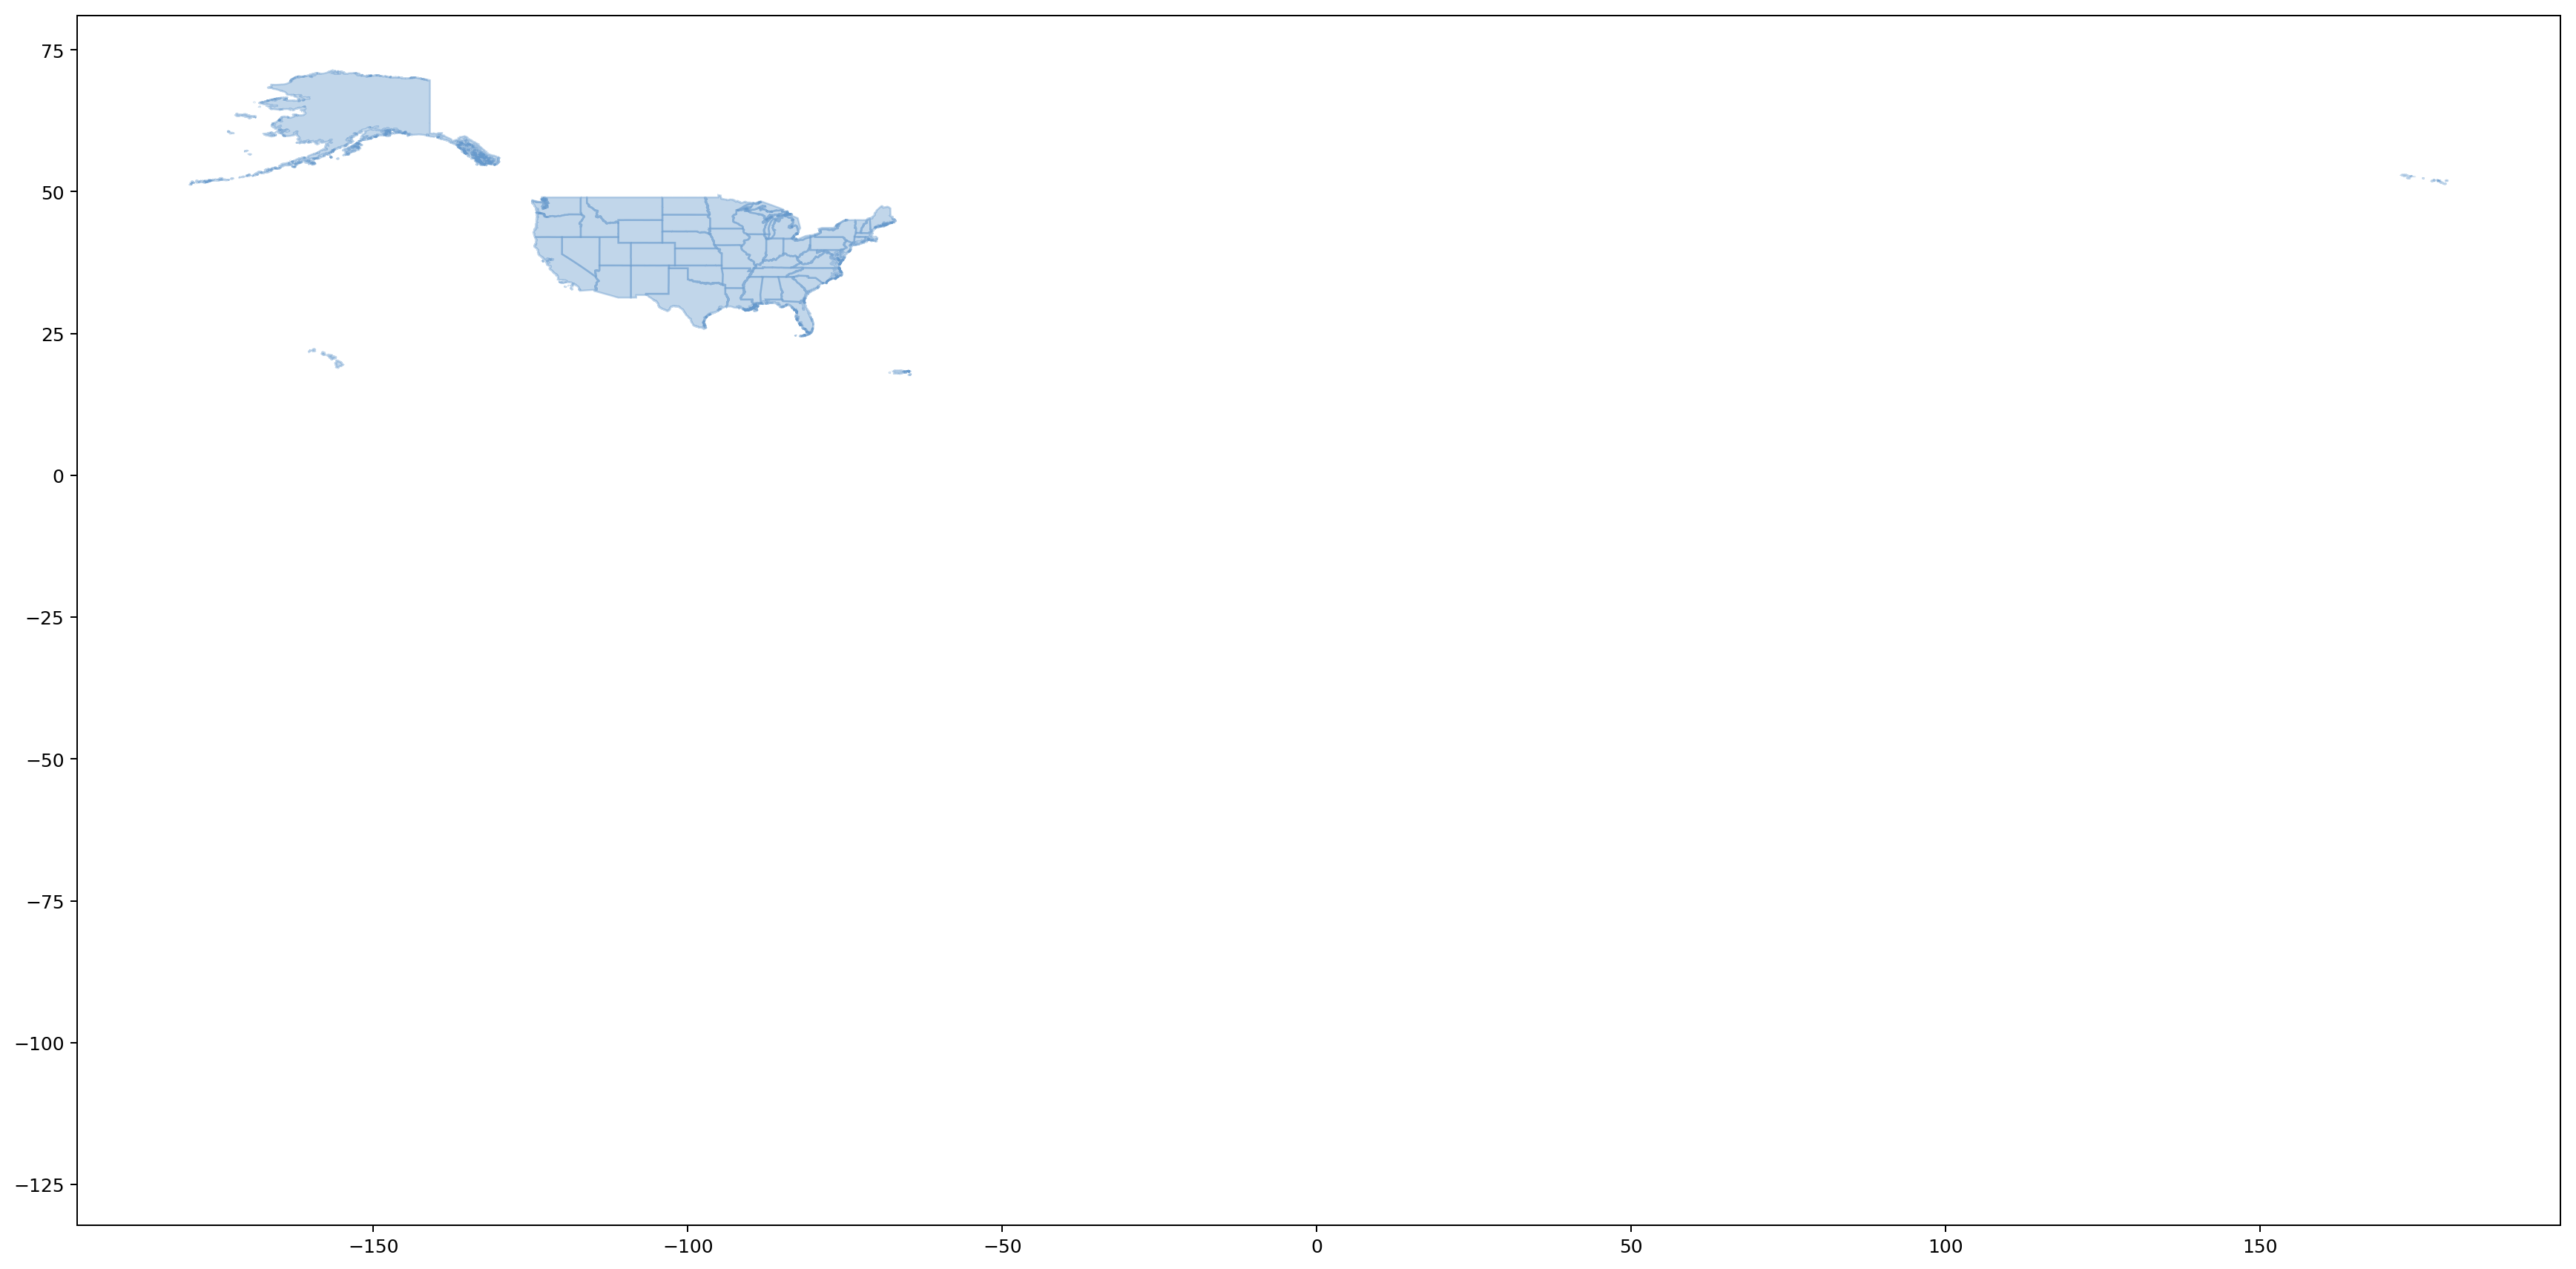

In [9]:
fig.gca().plot(*ls.xy, color='#FFFFFF')
plt.show()

This is where we set the outlines to a separate color. 

In [10]:
import numpy as np
path = np.array(ls)

In [11]:
path

array([[  37.766, -122.43 ],
       [  39.239, -114.89 ],
       [  38.82 , -104.82 ],
       [  38.039,  -97.96 ],
       [  38.94 ,  -92.32 ],
       [  39.156,  -86.53 ],
       [  40.749,  -84.08 ],
       [  41.494,  -81.66 ],
       [  42.325,  -80.06 ],
       [  41.767,  -78.01 ],
       [  41.395,  -75.68 ],
       [  40.625,  -73.78 ]])

In [12]:
for x, y in path:
    p = Point(x, y)
    spot = p.buffer(.1)
    x, y = spot.exterior.xy
    plt.fill(x, y, color='#cc6666', aa=True)
    plt.plot(x, y, color='#cc6666', aa=True, lw=1.0)
#plt.show()

And finally, we save this image we have created to a file with a png extension. 

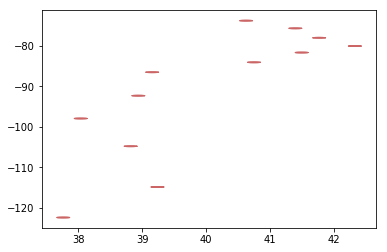

In [13]:
fig.gca().axis([-125, -65, 25, 50])
fig.gca().axis('off')
fig.savefig("states.png", facecolor='#F2F2F2', edgecolor='#F2F2F2')
plt.show()

Which should get you something like this:

![alt text](https://github.com/lesley2958/geospatial-data-analysis/blob/master/states.png?raw=true "Logo Title Text 1")

## Plotly

In order to use plotly, you have to own an account with your own API key. To find these, go into your plotly folder and type the following command into your terminal:

```
vim ~/.plotly/.credentials
```

It should be in the following format - the username and api_key fields will be especially important.

``` 
{
    "username": "username",
    "stream_ids": [],
    "api_key": "api_key",
    "proxy_username": "",
    "proxy_password": ""    
}
```
And so here we begin. First, as always, we import the needed modules. From there, we initialize our session by signing in on plotly.

In [14]:
import plotly.plotly as py
import plotly.offline as pyoff
from plotly.graph_objs import *

#py.sign_in('lc2958', 'lz0qbecyjk')

Plotly supports three types of maps - chloropeth, atlas maps, and satelite maps. Using data from the electoral college, we'll plot a map of the United States with a color scale. The darker the color, the greater number of votes.

So first, we load in the electoral college data. 

```python
data = Data([
    Choropleth(
        z=[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 8.0, 8.0, 
           9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 16.0, 18.0, 20.0, 20.0, 29.0, 29.0, 38.0, 55.0],
        autocolorscale=False,
        colorbar=ColorBar(
            title='Votes'
        ),
``` 

In the same 'Data' call, we feed in parameters that will be our sliding scale. 
```python
        colorscale=[[0.0, 'rgb(242,240,247)'], [0.2, 'rgb(218,218,235)'], [0.4, 'rgb(188,189,220)'], [0.6, 'rgb(158,154,200)'], [0.8, 'rgb(117,107,177)'], [1.0, 'rgb(84,39,143)']],
        hoverinfo='location+z',
```        

Again, continuing the parameters, we add labels for each state.  
```python
        locationmode='USA-states',
        locations=['DE', 'VT', 'ND', 'SD', 'MT', 'WY', 'AK', 'DC', 'NH', 'RI', 'ME', 'ID', 'HI', 'WV', 'NE', 'NM', 'MS', 'AR', 'IA', 'KS', 'NV', 'UT', 'CT', 
                   'OR', 'OK', 'KY', 'LA', 'SC', 'AL', 'CO', 'MD', 'MO', 'WI', 'MN', 'MA', 'TN', 'IN', 'AZ', 'WA', 'VA', 'NJ', 'NC', 'GA', 'MI', 'OH', 'PA', 'IL', 'NY', 'FL', 'TX', 'CA'],
        marker=Marker(
            line=Line(
                color='rgb(255,255,255)',
                width=2
            )
        ),
        text=['DE', 'VT', 'ND', 'SD', 'MT', 'WY', 'AK', 'DC', 'NH', 'RI', 'ME', 'ID', 'HI', 'WV', 'NE', 'NM', 'MS', 'AR', 'IA', 'KS', 'NV', 'UT', 'CT', 'OR', 
              'OK', 'KY', 'LA', 'SC', 'AL', 'CO', 'MD', 'MO', 'WI', 'MN', 'MA', 'TN', 'IN', 'AZ', 'WA', 'VA', 'NJ', 'NC', 'GA', 'MI', 'OH', 'PA', 'IL', 'NY', 'FL', 'TX', 'CA']
    )
])
```
As a final product, we'll have: 

In [15]:
data = Data([
    Choropleth(
        z=[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 8.0, 8.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 16.0, 18.0, 20.0, 20.0, 29.0, 29.0, 38.0, 55.0],
        autocolorscale=False,
        colorbar=ColorBar(
            title='Votes'
        ),
        colorscale=[[0.0, 'rgb(242,240,247)'], [0.2, 'rgb(218,218,235)'], [0.4, 'rgb(188,189,220)'], [0.6, 'rgb(158,154,200)'], [0.8, 'rgb(117,107,177)'], [1.0, 'rgb(84,39,143)']],
        hoverinfo='location+z',
        locationmode='USA-states',
        locations=['DE', 'VT', 'ND', 'SD', 'MT', 'WY', 'AK', 'DC', 'NH', 'RI', 'ME', 'ID', 'HI', 'WV', 'NE', 'NM', 'MS', 'AR', 'IA', 'KS', 'NV', 'UT', 'CT', 'OR', 'OK', 'KY', 'LA', 'SC', 'AL', 'CO', 'MD', 'MO', 'WI', 'MN', 'MA', 'TN', 'IN', 'AZ', 'WA', 'VA', 'NJ', 'NC', 'GA', 'MI', 'OH', 'PA', 'IL', 'NY', 'FL', 'TX', 'CA'],
        marker=Marker(
            line=Line(
                color='rgb(255,255,255)',
                width=2
            )
        ),
        text=['DE', 'VT', 'ND', 'SD', 'MT', 'WY', 'AK', 'DC', 'NH', 'RI', 'ME', 'ID', 'HI', 'WV', 'NE', 'NM', 'MS', 'AR', 'IA', 'KS', 'NV', 'UT', 'CT', 'OR', 'OK', 'KY', 'LA', 'SC', 'AL', 'CO', 'MD', 'MO', 'WI', 'MN', 'MA', 'TN', 'IN', 'AZ', 'WA', 'VA', 'NJ', 'NC', 'GA', 'MI', 'OH', 'PA', 'IL', 'NY', 'FL', 'TX', 'CA']
    )
])

/usr/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:174: DeprecationWarning:

plotly.graph_objs.ColorBar is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.marker.ColorBar
  - plotly.graph_objs.surface.ColorBar
  - etc.


/usr/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:372: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


/usr/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:426: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


/usr/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecate

And so now, we've formatted our data. But of course, there needs to be a layout for our code to follow. Luckily, we can just use the Layout method. As parameters, we feed in color schemes and labels. 

In [16]:
layout = Layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showlakes=True
    ),
    title='2016 Electoral College Votes'
)

And we're almost done! The last step is to simply construct the map and use plotly to actually display it. 

In [17]:
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

## 5.0 Google Maps  

The Google Maps API is an awesome resource when working on a project involving any sort of map visualization or analysis. Its one downside is that there is a query limit, which is why we'll be working with a very small dataset.

We'll be using several modules for this exercise! 

In [18]:
import pandas as pd 
import geocoder 
from shapely.geometry import Point
from geopandas import GeoDataFrame
from geojson import Feature, FeatureCollection
from geojsonio import display

Here we use `pandas` to open a CSV with the names and addresses of the 4 local boba shops from this location. `Googlemaps` is what will allow us to eventually retrieve the coordinates of each boba place:

In [19]:
boba = pd.read_csv('./boba.csv')

Now, let's take a look at our boba dataframe:

             Name:                           Address        
0        Boba Guys  11 Waverly Pl New York, NY 10002    
1          Jupioca   123 W 3rd St New York, NY 10012    
2      Kung Fu Tea  31 Waverly Pl New York, NY 10003    
3  Vivi Bubble Tea    65 W 8th St New York, NY 10011

So as I said, this dataframe contains the name and addresses of 4 bubble tea places. From these addresses, we want to create 2 <b>new</b> columns containing the latitude and longitudes of each. 

Notice that we have two apply functions to transform the address into the geometric types we want. The first apply function uses`geocoder.google` to encode the address as geometric object. The second apply function pulls the latitude or longitude attribute of that object. 

In [20]:
boba['Lat'] = boba['Address'].apply(geocoder.google).apply(lambda x: x.lat)
boba['Longitude'] = boba['Address'].apply(geocoder.google).apply(lambda x: x.lng)

Now that we have the latitude and longitude of each bubble tea place, we can make another new column to store the points using `shapely`. 

In [22]:
boba['Coordinates'] = [Point(xy) for xy in zip(boba.Longitude, boba.Lat)]

The `crs` parameter is simply a reference to what kind of coordinate system we're using. Once we've declared those, we can convert the data we've got into a `GeoDataFrame`. This is an important step because it then allows us to very easily convert it to geojson. 

In [24]:
crs = {'init': 'epsg:4326'}
geo_df = GeoDataFrame(boba['Name:'], crs=crs, geometry=list(boba['Coordinates']))

In [30]:
geo_df.to_csv('geo_df.csv')

Above, `boba['Name:']` is the first parameter because it will serve as provided information in the visualization. The geometry parameter is a reference to the coordinate data, converted to a list. Finally, we can convert it to geojson and display it using geojsonio!

In [31]:
display(geo_df.to_json())

'http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22id%22%3A%20%220%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22Name%3A%22%3A%20%22Boba%20Guys%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-73.9940771%2C%2040.7301485%5D%7D%7D%2C%20%7B%22id%22%3A%20%221%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22Name%3A%22%3A%20%22Jupioca%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-74.0003803%2C%2040.7307534%5D%7D%7D%2C%20%7B%22id%22%3A%20%222%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22Name%3A%22%3A%20%22Kung%20Fu%20Tea%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5BNaN%2C%20NaN%5D%7D%7D%2C%20%7B%22id%22%3A%20%223%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22Name%3A%22%3A%20%22Vivi%20B

## 6.0 Final Words

Most of these techniques are interchangeable in R, but Python is one of the best suitable languages for geospatial analysis. Its modules and tools are built with developers in mind, making the transition into geospatial analysis must easier.

### 6.1 Resources

[GeoJSON](http://geojson.org/) <br>
[OpenStreetMap](https://www.openstreetmap.org/#map=5/51.500/-0.100) <br>
[CartoDB](https://carto.com/)